In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import cdflib
import datetime as dt
import matplotlib as mpl
import astropy.units as u
from astropy.time import Time
from sunpy.net import Fido, attrs as a
from radiospectra.spectrogram import Spectrogram
from astropy.visualization import ImageNormalize, PercentileInterval

# try to use the precise epoch 
import matplotlib as mpl
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

# Make sure CDF lib is loaded
os.environ['CDF_LIB'] = os.path.join(os.getcwd(), 'cdf38_1-dist', 'bin' ,'definitions.B')

# Requires MASER module (https://gitlab.obspm.fr/maser/maser4py/-/tree/namespace)
from maser.data import Data
from maser.plot.rpw.tnr import plot_auto

In [ ]:
[x for x in dir(ax) if not x.startswith('_')]

In [36]:
cdf_file_path = './solo_L2_rpw-tnr-surv_20221201_V03.cdf'

cdf = cdflib.CDF(cdf_file_path)

In [16]:
cdf.globalattsget()

{'ACCESS_FORMAT': ['CDF'],
 'ACCESS_URL': ['https://rpw.lesia.obspm.fr/roc/data/pub/solo/rpw/data/L2/thr/2022/12/solo_L2_rpw-tnr-surv_20221201_V03.cdf'],
 'Acknowledgement': ['The authors must acknowledge the Solar Orbiter/RPW Investigation (M. Maksimovic, PIs) for access to data.'],
 'APPLICABLE': ['SOL-SGS-TN-0009 (2.4)'],
 'Data_type': ['H0>High Resolution data'],
 'Data_version': ['03'],
 'Descriptor': ['RPW-TNR-SURV>RPW Thermal Noise Receiver in survey mode'],
 'Discipline': ['Space Physics>Interplanetary Studies'],
 'File_naming_convention': ['<Source_name>_<LEVEL>_<Descriptor>_<Datetime>_V<Data_version>'],
 'File_ID': ['f0cdcaf2-d132-4f35-8870-07d4047ff179'],
 'Generated_by': ['RPW Operations Centre located at LESIA (Meudon, France)'],
 'Generation_date': ['2023-11-13T12:33:23'],
 'HTTP_LINK': ['https://rpw.lesia.obspm.fr'],
 'Instrument_type': ['Radio and Plasma Waves (space)'],
 'LINK_TEXT': ['RPW Web site at LESIA'],
 'LINK_TITLE': ['RPW Web site'],
 'Logical_file_id': ['solo

In [35]:
vars(cdf.cdf_info())

{'CDF': PosixPath('/home/mnedal/DIAS/solo_L2_rpw-tnr-surv_20221201_V03.cdf'),
 'Version': '3.8.1',
 'Encoding': 1,
 'Majority': 'Column_major',
 'rVariables': [],
 'zVariables': ['Epoch',
  'NUM',
  'TIME_INTERPOL_FLAG',
  'QUALITY_FLAG',
  'QUALITY_BITMASK',
  'SWEEP_NUM',
  'MEASUREMENT_DURATION',
  'TICKS_NR',
  'DELTA_TIME',
  'SURVEY_MODE',
  'AVERAGE_NR',
  'AUTO_CROSS_STATUS',
  'CHANNEL_STATUS',
  'FRONT_END',
  'SENSOR_CONFIG',
  'RPW_STATUS',
  'TEMPERATURE',
  'TNR_BAND',
  'FREQUENCY',
  'INTEGRATION_TIME',
  'BANDWIDTH',
  'AUTO1',
  'AUTO2',
  'CROSS_R',
  'CROSS_I',
  'PHASE',
  'BAND_LABEL',
  'CHANNEL_LABEL',
  'TEMPERATURE_LABEL',
  'RPW_STATUS_LABEL',
  'MAGNETIC_SPECTRAL_POWER1',
  'MAGNETIC_SPECTRAL_POWER2',
  'SYNCHRO_FLAG',
  'TNR_BAND_FREQ'],
 'Attributes': [{'ACCESS_FORMAT': 'Global'},
  {'ACCESS_URL': 'Global'},
  {'Acknowledgement': 'Global'},
  {'APPLICABLE': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'

In [94]:
vars(cdf.cdf_info())['zVariables']

['Epoch',
 'NUM',
 'TIME_INTERPOL_FLAG',
 'QUALITY_FLAG',
 'QUALITY_BITMASK',
 'SWEEP_NUM',
 'MEASUREMENT_DURATION',
 'TICKS_NR',
 'DELTA_TIME',
 'SURVEY_MODE',
 'AVERAGE_NR',
 'AUTO_CROSS_STATUS',
 'CHANNEL_STATUS',
 'FRONT_END',
 'SENSOR_CONFIG',
 'RPW_STATUS',
 'TEMPERATURE',
 'TNR_BAND',
 'FREQUENCY',
 'INTEGRATION_TIME',
 'BANDWIDTH',
 'AUTO1',
 'AUTO2',
 'CROSS_R',
 'CROSS_I',
 'PHASE',
 'BAND_LABEL',
 'CHANNEL_LABEL',
 'TEMPERATURE_LABEL',
 'RPW_STATUS_LABEL',
 'MAGNETIC_SPECTRAL_POWER1',
 'MAGNETIC_SPECTRAL_POWER2',
 'SYNCHRO_FLAG',
 'TNR_BAND_FREQ']

In [79]:
cdf.varget('AVERAGE_NR')

array([16, 16, 16, ..., 16, 16, 16], dtype=uint8)

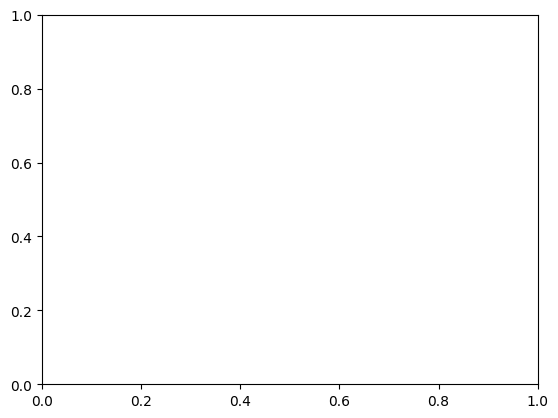

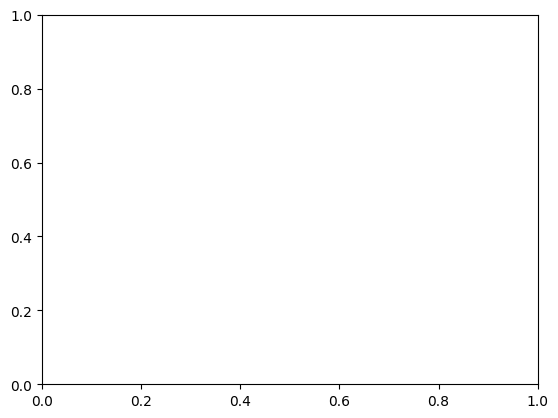

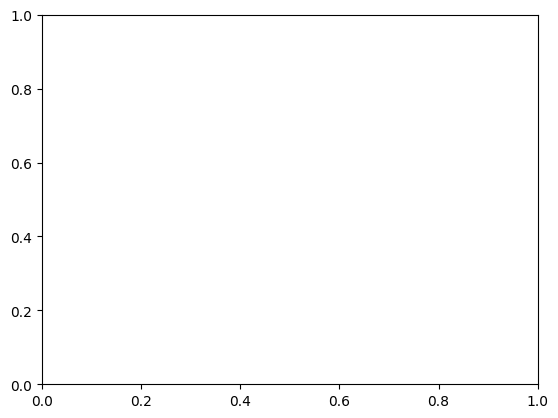

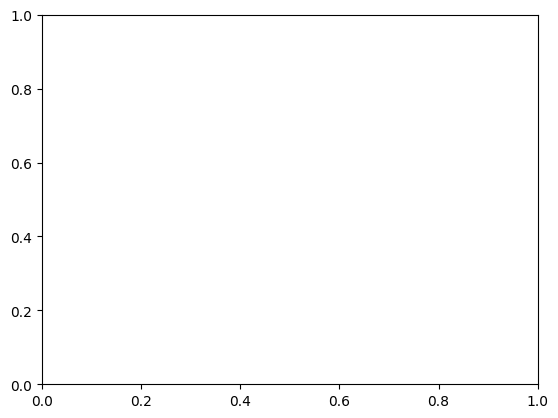

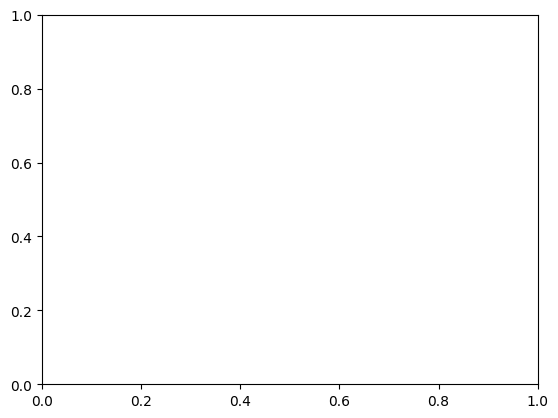

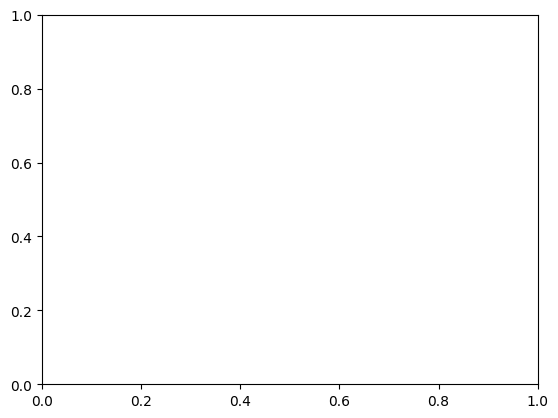

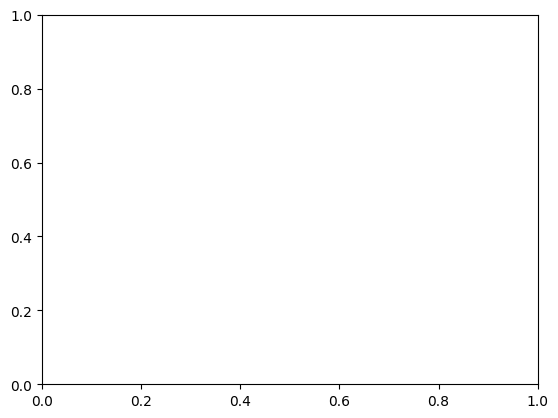

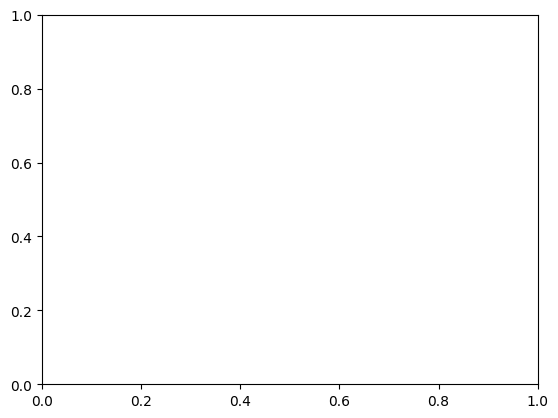

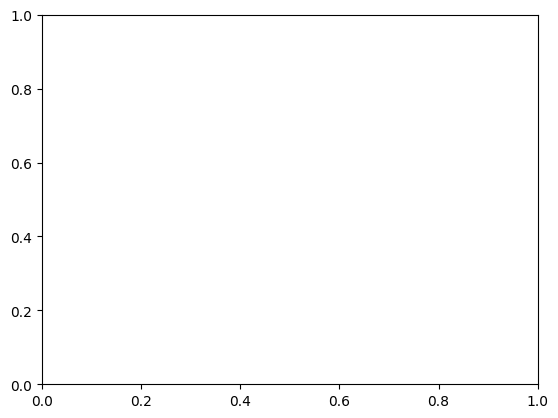

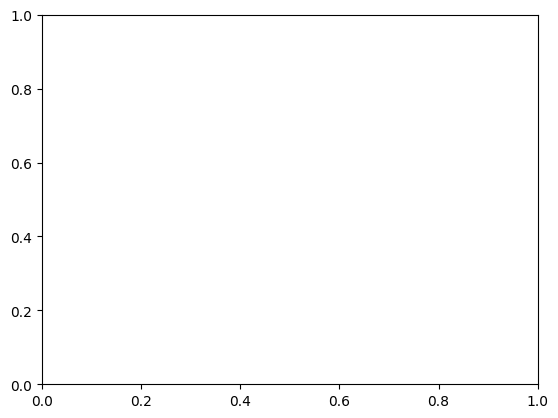

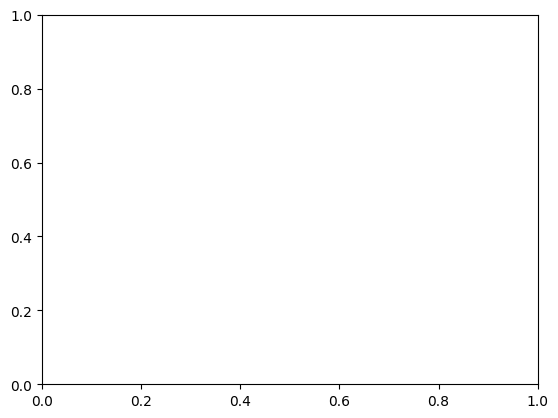

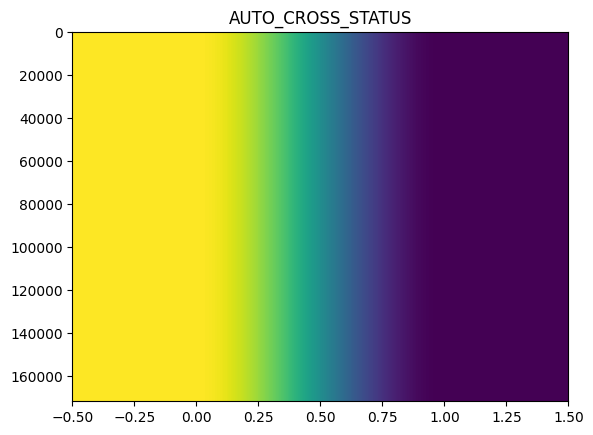

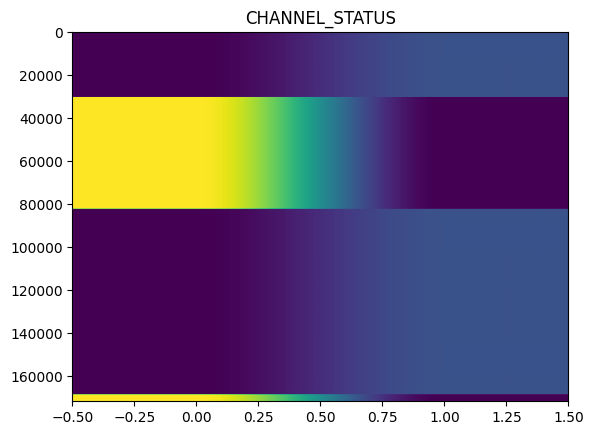

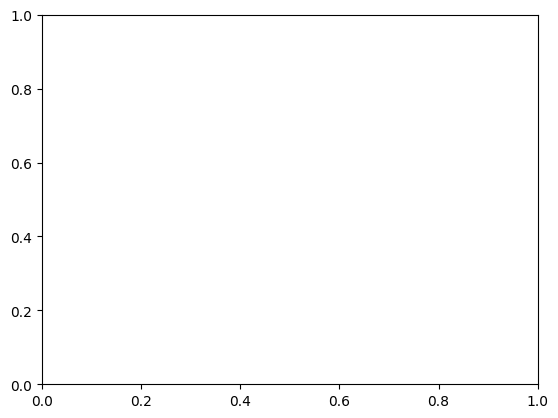

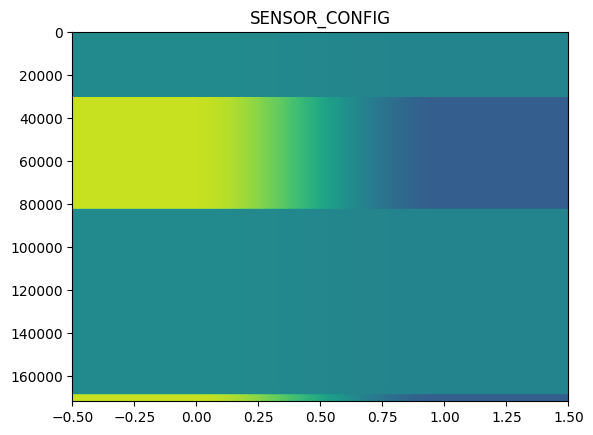

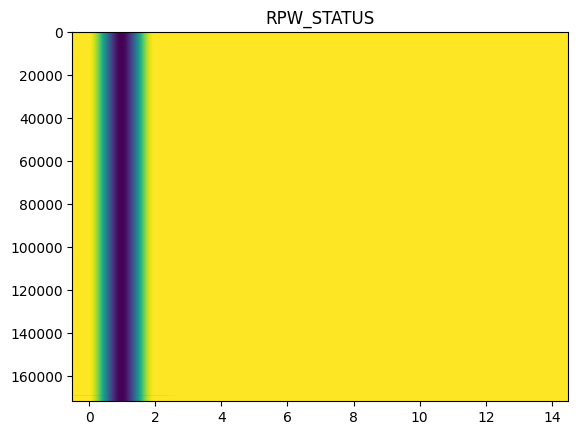

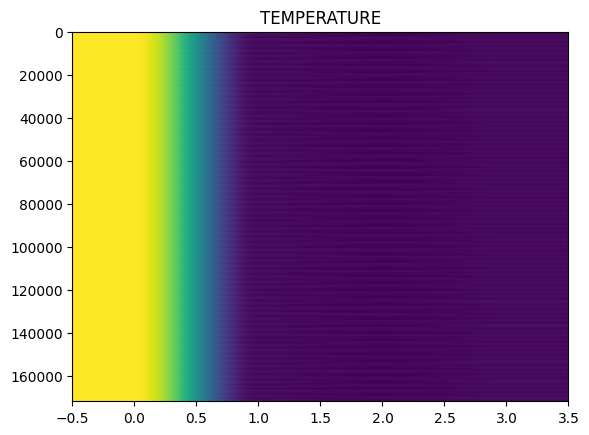

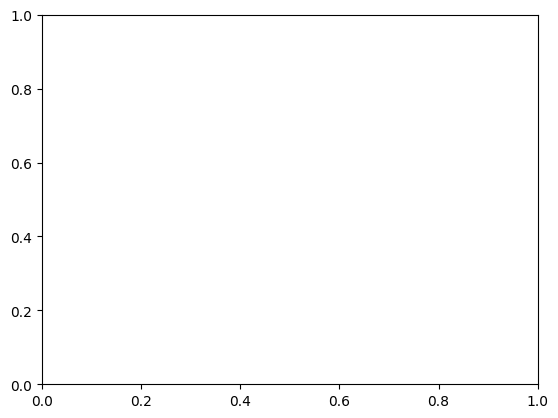

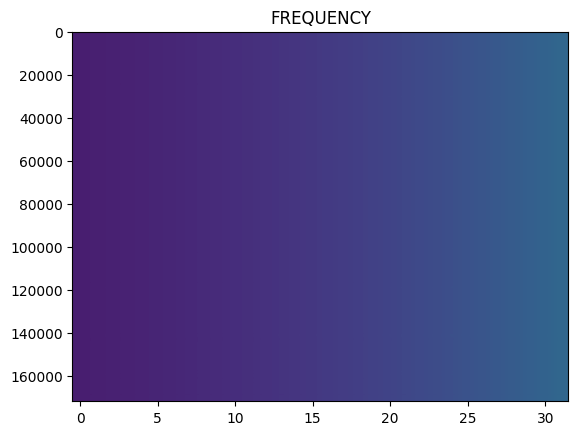

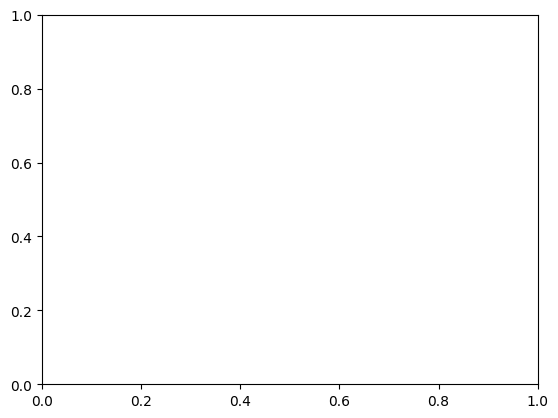

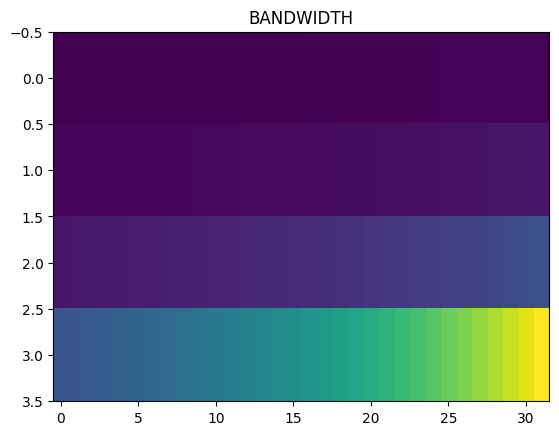

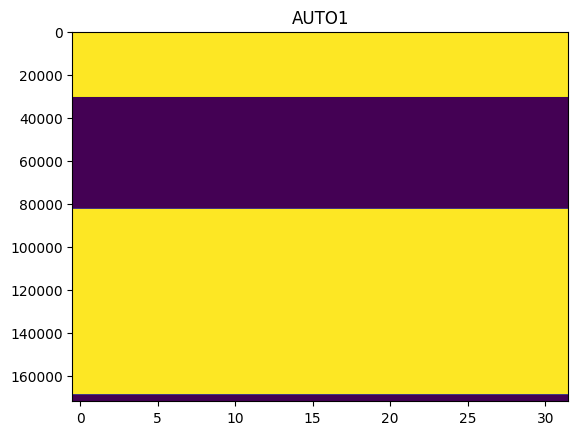

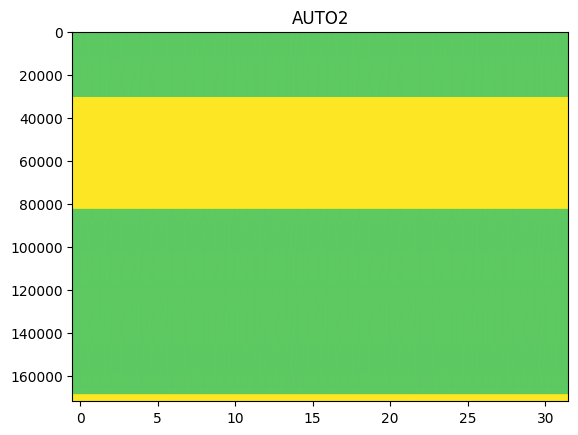

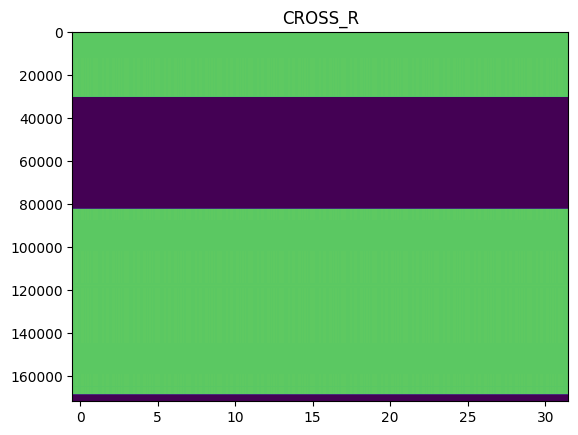

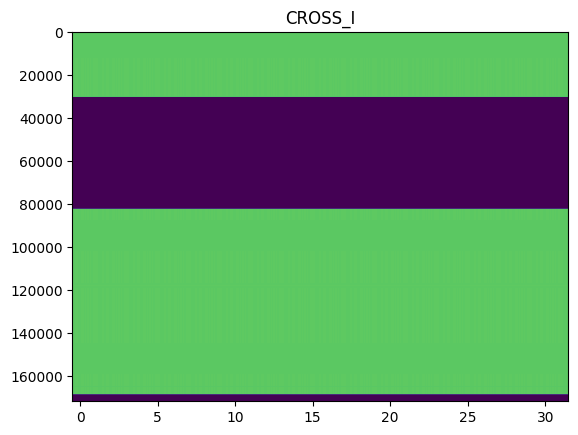

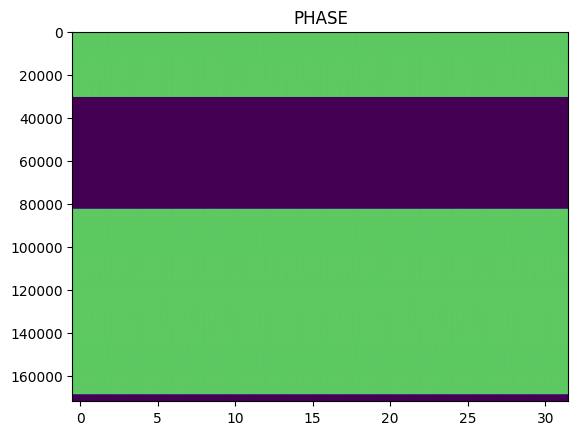

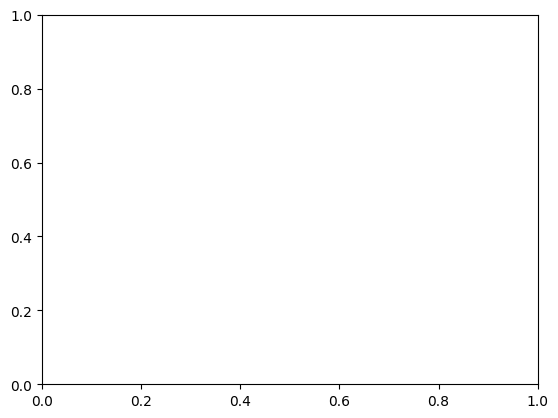

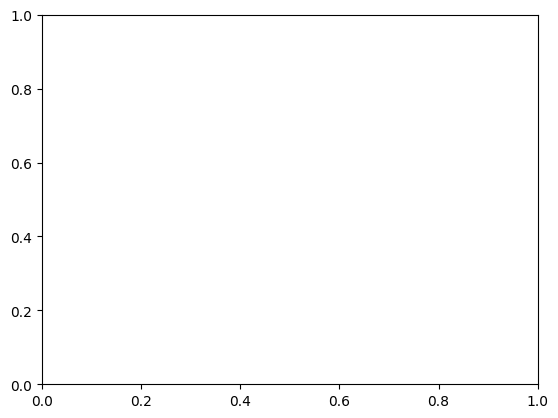

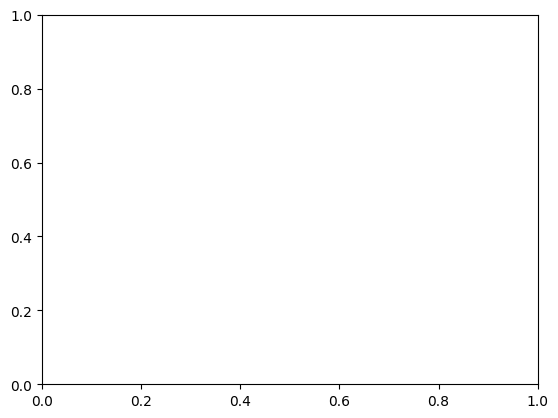

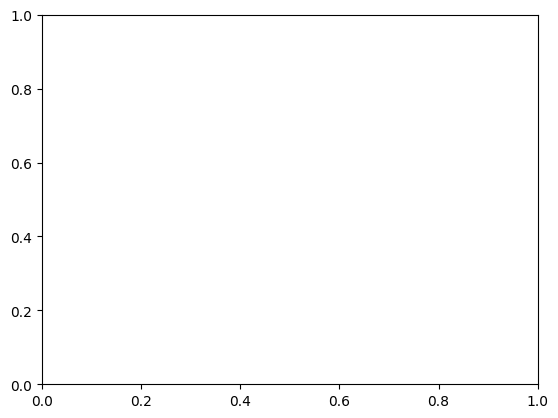

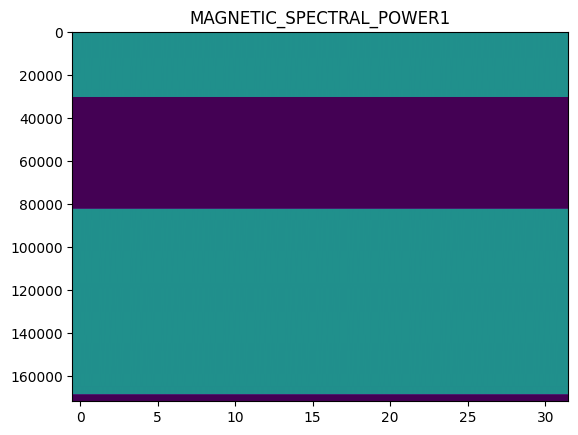

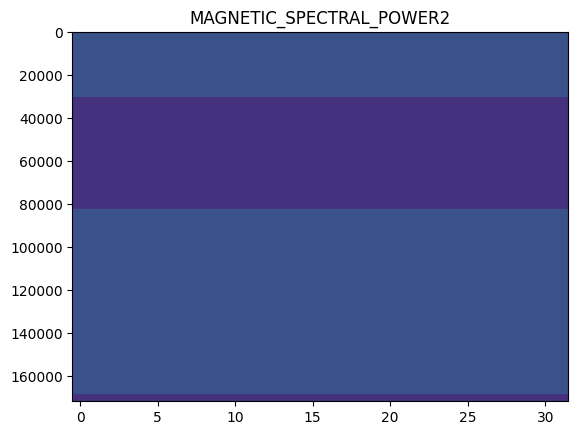

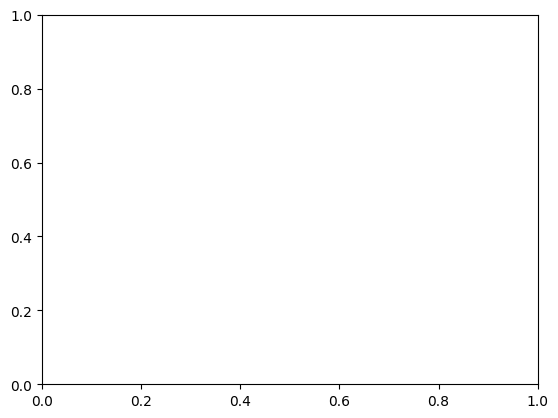

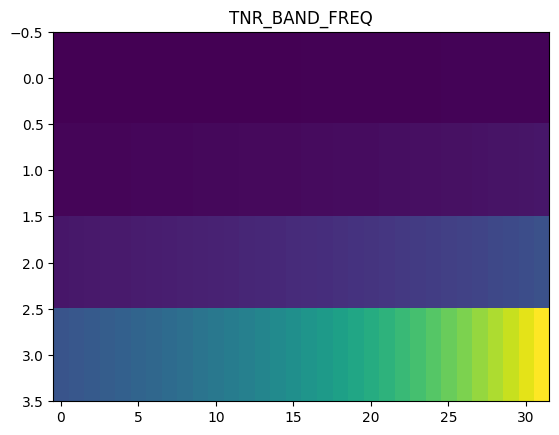

In [86]:
cdf_file_path = '/home/mnedal/DIAS/RPW/solo_L2_rpw-tnr-surv_20221202_V03.cdf'
cdf = cdflib.CDF(cdf_file_path)

for var in vars(cdf.cdf_info())['zVariables']:
    try:
        plt.figure()
        plt.imshow(cdf.varget(var), aspect='auto')
        plt.title(var)
        plt.show()
    except:
        pass

In [91]:
import sunpy_soar
from sunpy.net import Fido
from sunpy.net.attrs import Instrument, Level, Time
from sunpy_soar.attrs import Product

# Create search attributes
instrument = Instrument('RPW')
time = Time('2020-12-01', '2020-12-02')
level = Level(2)
identifier = Product('RPW-TNR-SURV')

# Do search
result = Fido.search(instrument, time, level, identifier)
display(result)

# Download files
files = Fido.fetch(result, path='./{instrument}/{file}')
print(files)

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str12,str2,str23,str23,str29,str37,float64,object
RPW,rpw-tnr-surv,L2,2020-12-01 00:00:00.000,2020-12-02 00:00:00.000,solo_L2_rpw-tnr-surv_20201201,solo_L2_rpw-tnr-surv_20201201_V05.cdf,148.59,None
RPW,rpw-tnr-surv,L2,2020-12-02 00:00:00.000,2020-12-03 00:00:00.000,solo_L2_rpw-tnr-surv_20201202,solo_L2_rpw-tnr-surv_20201202_V05.cdf,148.582,None


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_rpw-tnr-surv_20201202_V05.cdf:   0%|          | 0.00/149M [00:00<?, ?B/s]

solo_L2_rpw-tnr-surv_20201201_V05.cdf:   0%|          | 0.00/149M [00:00<?, ?B/s]

['RPW/solo_L2_rpw-tnr-surv_20201201_V05.cdf', 'RPW/solo_L2_rpw-tnr-surv_20201202_V05.cdf']


In [92]:
files

['RPW/solo_L2_rpw-tnr-surv_20201201_V05.cdf', 'RPW/solo_L2_rpw-tnr-surv_20201202_V05.cdf']

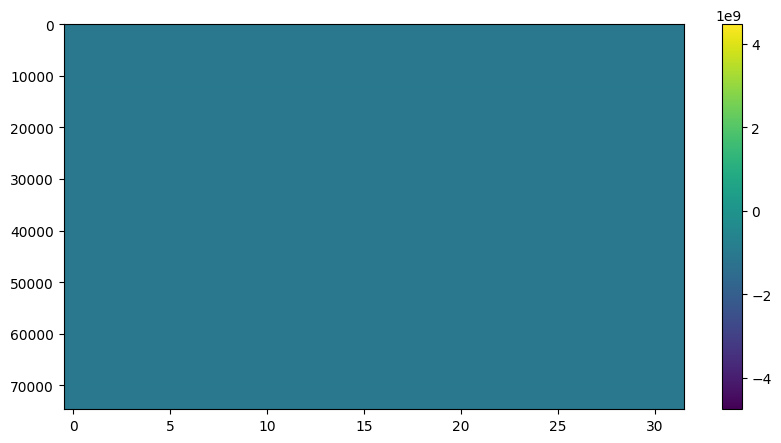

In [116]:
cdf = cdflib.CDF(files[0])
data = cdf.varget('CROSS_I')

plt.figure(figsize=[10,5])
plt.imshow(data,
           vmin=(np.mean(data)-2 * np.std(data)),
           vmax=(np.mean(data)+3 * np.std(data)),
           aspect='auto')
plt.colorbar()
plt.show()